# **Supplementary Code 4**
This notebook was used for analysis of NGS reads containing intended prime-editing and synonymous mutation marker. For more detail, please read Methods and Supplementary Information. 

Lead contact: Hyoungbum Henry Kim (hkim1@gmail.com)

Technical contact: Goosang Yu (gsyu93@gmail.com), Yusang Jung (ys.jung@yuhs.ac)

## Directory tree

📦Working directory  
 ┣ 📂data  
 ┃ ┣ 📂NGS_FASTQ_files  
 ┃ ┣ 📂NGS_frequency_table  
 ┃ ┃ ┣ 📜C4Bosutinib791.txt  
 ┃ ┃ ┣ 📜C4Control797.txt  
 ┃ ┃ ┗ 📜...  
 ┃ ┣ 📂read_counts  
 ┃ ┣ 📂statistics  
 ┃  
 ┣ 📂src  
 ┃ ┣ 📜Alignment.py  
 ┃ ┣ 📜VarCalling.py  
 ┃  
 ┣ 📂variants_info  
 ┃ ┣ 📜ex4_info.csv  
 ┃ ┣ 📜ex4-1_output_template.csv  
 ┃ ┣ 📜ex4-2_output_template.csv  
 ┃ ┣ 📜ex5_info.csv  
 ┃ ┣ 📜ex6_info.csv  
 ┃ ┣ 📜ex7_info.csv  
 ┃ ┣ 📜ex8_info.csv  
 ┃ ┣ 📜ex9_info.csv  
 ┃ ┣ 📜invivo_ex4_info.csv  
 ┃ ┗ 📜invivo_ex9_info.csv  
 ┃  
 ┗ 📜SuppleCode4.ipynb (this file)  

# Requirements
- CRISPResso2 (>= 2.x.x)
- pandas

# High-throughput screening analysis

### Analysis 1: variants calling and make read count file
CRISPResso를 돌린 후, read count 파일을 만든다. 모든 분석의 기초가 되는 파일을 만드는 과정이다. 그 이후에는 Odds ratio / fisher t-test p-value를 구해서 filtering을 한다. 

In [1]:
import os
import pandas as pd
from tqdm import tqdm
from glob import glob

from src.Alignment import ABL1VUS
from src.VarCalling import make_count_file, read_statistics, VariantsLFC

In [3]:
# Make count files from frequency table

freq_tables = glob('data/frequency_table/*.txt')

for f in freq_tables:

    n_sample = os.path.basename(f).replace('.txt', '')
    exon_num = n_sample.split('Exon')[1][0]
    ref_info = f'variants_info/ex{exon_num}_info.csv'

    
    df_cnt = make_count_file(f, ref_info)
    df_cnt.to_csv(f'data/read_counts/Count_{n_sample}.csv', index=False)

[Info] Read counting: K562PE2_unedit_Exon5: 100%|██████████| 36438/36438 [00:03<00:00, 10306.87it/s]
[Info] Read counting: K562PE4K_HTS_Exon4_Rep1_Asciminib: 100%|██████████| 1126274/1126274 [01:52<00:00, 9996.74it/s] 
[Info] Read counting: K562PE4K_HTS_Exon4_Rep1_Bosutinib: 100%|██████████| 1310545/1310545 [02:08<00:00, 10160.25it/s]
[Info] Read counting: K562PE4K_HTS_Exon4_Rep1_Dasatinib: 100%|██████████| 1096266/1096266 [01:48<00:00, 10090.48it/s]
[Info] Read counting: K562PE4K_HTS_Exon4_Rep1_DMSO: 100%|██████████| 1231441/1231441 [02:02<00:00, 10064.29it/s]
[Info] Read counting: K562PE4K_HTS_Exon4_Rep1_Imatinib: 100%|██████████| 1290582/1290582 [02:08<00:00, 10016.11it/s]
[Info] Read counting: K562PE4K_HTS_Exon4_Rep1_Nilotinib: 100%|██████████| 1059960/1059960 [01:47<00:00, 9905.26it/s] 
[Info] Read counting: K562PE4K_HTS_Exon4_Rep1_Ponatinib: 100%|██████████| 964463/964463 [01:36<00:00, 9955.14it/s] 
[Info] Read counting: K562PE4K_HTS_Exon4_Rep2_Asciminib: 100%|██████████| 1532951

In [2]:
# Calculate statistics with read count for each variants

list_control = [
    'K562PE4K_HTS_Exon4_Rep1_DMSO',
    'K562PE4K_HTS_Exon4_Rep2_DMSO',
    'K562PE4K_HTS_Exon5_Rep1_DMSO',
    'K562PE4K_HTS_Exon5_Rep2_DMSO',
    'K562PE4K_HTS_Exon6_Rep1_DMSO',
    'K562PE4K_HTS_Exon6_Rep2_DMSO',
    'K562PE4K_HTS_Exon7_Rep1_DMSO',
    'K562PE4K_HTS_Exon7_Rep2_DMSO',
    'K562PE4K_HTS_Exon8_Rep1_DMSO',
    'K562PE4K_HTS_Exon8_Rep2_DMSO',
    'K562PE4K_HTS_Exon9_Rep1_DMSO',
    'K562PE4K_HTS_Exon9_Rep2_DMSO',
    ]

for test_sample in list_control:
    
    background_sample = test_sample.split('_Rep')[0].replace('HTS', 'unedit')

    test_file       = f'data/read_counts/Count_{test_sample}.csv'
    background_file = f'data/read_counts/Count_{background_sample}.csv'

    df_stats = read_statistics(test_file, background_file)

    df_stats.to_csv(f'data/statistics/Stat_{test_sample}.csv', index=False)

Analysis: Count_K562PE4K_HTS_Exon4_Rep1_DMSO
Analysis: Count_K562PE4K_HTS_Exon4_Rep2_DMSO
Analysis: Count_K562PE4K_HTS_Exon5_Rep1_DMSO
Analysis: Count_K562PE4K_HTS_Exon5_Rep2_DMSO
Analysis: Count_K562PE4K_HTS_Exon6_Rep1_DMSO
Analysis: Count_K562PE4K_HTS_Exon6_Rep2_DMSO
Analysis: Count_K562PE4K_HTS_Exon7_Rep1_DMSO
Analysis: Count_K562PE4K_HTS_Exon7_Rep2_DMSO
Analysis: Count_K562PE4K_HTS_Exon8_Rep1_DMSO
Analysis: Count_K562PE4K_HTS_Exon8_Rep2_DMSO
Analysis: Count_K562PE4K_HTS_Exon9_Rep1_DMSO
Analysis: Count_K562PE4K_HTS_Exon9_Rep2_DMSO


In [3]:
# Filtering variants and calculate normalized log 2 fold changes
list_sample = [
    'K562PE4K_HTS_Exon4',
    'K562PE4K_HTS_Exon5',
    'K562PE4K_HTS_Exon6',
    'K562PE4K_HTS_Exon7',
    'K562PE4K_HTS_Exon8',
    'K562PE4K_HTS_Exon9',
    ]

list_chem = [
    'Imatinib', 
    'Nilotinib', 
    'Bosutinib', 
    'Dasatinib', 
    'Ponatinib', 
    'Asciminib', 
]

for sample in list_sample:
    for chem in list_chem:
        
        df_rep1, df_rep2 = VariantsLFC(sample, chem).calculate(OR_cutoff=2, p_cutoff=0.05, rpm_cutoff=10, lws_frac=0.15)

        df_rep1.to_csv(f'data/statistics/Filtered_{sample}_Rep1_{chem}.csv', index=False)
        df_rep2.to_csv(f'data/statistics/Filtered_{sample}_Rep2_{chem}.csv', index=False)

In [12]:
# Exon combine
# Filtering variants and calculate normalized log 2 fold changes
list_sample = [
    'K562PE4K_HTS',
    'K562PE4K_HTS',
    'K562PE4K_HTS',
    'K562PE4K_HTS',
    'K562PE4K_HTS',
    'K562PE4K_HTS',
    ]

list_chem = [
    'Imatinib', 
    'Nilotinib', 
    'Bosutinib', 
    'Dasatinib', 
    'Ponatinib', 
    'Asciminib', 
]


def combine_SNV(files:list):
    list_df = [pd.read_csv(file) for file in files]
    return pd.concat(list_df, axis = 0).set_index('SNV_var')

def classification(df:pd.DataFrame) -> pd.DataFrame:
    # LFC 구하는 pipeline에 아예 classification도 추가되도록 넣어버리기
    synonymous_df = df[df['mut_type']=='Synonymous'].copy()
    resistant_1  = synonymous_df['nLFC_1'].quantile(0.997)
    resistant_2  = synonymous_df['nLFC_2'].quantile(0.997)
    senseitive_1 = synonymous_df['nLFC_1'].quantile(0.95)
    senseitive_2 = synonymous_df['nLFC_2'].quantile(0.95)

    def label(row):
        if row['nLFC_1'] > resistant_1 and row['nLFC_2'] > resistant_2:
            return 'Resistant'
        elif row['nLFC_1'] < senseitive_1 and row['nLFC_2'] < senseitive_2 :
            return 'Sensitive'
        else:
            return 'Intermediate'
        
    df['Classification'] = df.apply(label, axis = 1)

    return df

def get_adjusted_lfc(sample:str, chem:str) -> pd.DataFrame:

    r1_files = glob(f'data/statistics/Filtered_{sample}_Exon*_Rep1_{chem}.csv')
    df1  = combine_SNV(r1_files).rename(columns={'lws_LFC': 'nLFC_1'})

    r2_files = glob(f'data/statistics/Filtered_{sample}_Exon*_Rep2_{chem}.csv')
    df2  = combine_SNV(r2_files).rename(columns={'lws_LFC': 'nLFC_2'})['nLFC_2']

    df_merge = pd.concat([df1, df2], axis=1)
    df_merge['Adjusted_LFC'] = df_merge[['nLFC_1', 'nLFC_2']].mean(axis=1) # merge 끝

    df_merge = classification(df_merge)

    return df_merge

def get_resistance_score(df_adjLFC:pd.DataFrame):
    
    dict_mut_type = {}
    for idx in df_adjLFC.index:
        data = df_adjLFC.loc[idx]
        dict_mut_type[data['AA_var']] = data['mut_type']


    aa_df = df_adjLFC.groupby('AA_var').mean(numeric_only=True)[['nLFC_1', 'nLFC_2']]
    
    aa_df['Resistance_score'] = aa_df.mean(axis = 1)
    aa_df['mut_type'] = [dict_mut_type[AA_var] for AA_var in aa_df.index]

    aa_df = classification(aa_df)

    return aa_df

# SNV level adjusted LFC 
for chem in list_chem:
    for sample in list_sample:
        df_merge = get_adjusted_lfc(sample, chem)
        df_merge.to_csv(f'data/adjusted_LFC/AdjustedLFC_{sample}_{chem}.csv')


# AA level Resistance score
for sample in glob('data/adjusted_LFC/AdjustedLFC_K562PE4K_HTS_*.csv'):
    
    df_rs = pd.read_csv(sample)
    df_rs = make_resistance_score(df_rs)

    n_output = os.path.basename(sample).replace('AdjustedLFC', 'ResistanceScore')
    df_rs.to_csv(f'data/resistance_score/{n_output}')


(0.0, 200.0)

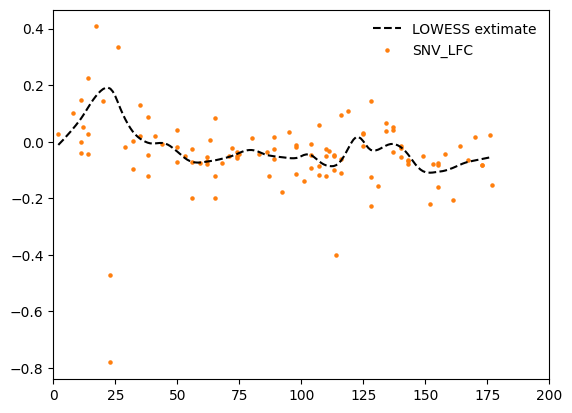

In [7]:
from moepy import lowess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# parameters
frac = 0.15

df_ana = pd.read_csv('data/statistics/Filtered_K562PE4K_HTS_Exon6_Rep1_Bosutinib.csv')

# 옵션 1: Synonymous mutation만 골라서 LOWESS reg 했을 때
df_syn = df_ana[df_ana['mut_type']=='Synonymous'].copy().reset_index(drop=True)

x = np.array(df_syn['var_pos'], dtype=np.int64)
y = np.array(df_syn['raw_LFC'], dtype=np.float64)

syn_std = np.std(df_syn['raw_LFC'])

lowess_model = lowess.Lowess()
lowess_model.fit(x, y, frac=frac)

# x_pred = np.linspace(0, 260, 261)
x_pred = np.array([pos for pos in range(x[0], x[-1]+1)], dtype=np.int64)
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.plot(x_pred, y_pred, '--', label='LOWESS extimate', color='k', zorder=3)
plt.scatter(x, y, label='SNV_LFC', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
plt.xlim(0, 200) # position range에 따라서 변경 필요함 


In [9]:
def classification(df:pd.DataFrame) -> pd.DataFrame:
    # LFC 구하는 pipeline에 아예 classification도 추가되도록 넣어버리기
    synonymous_df = df[df['mut_type']=='Synonymous'].copy()
    resistant_1  = synonymous_df['nLFC_1'].quantile(0.997)
    resistant_2  = synonymous_df['nLFC_2'].quantile(0.997)
    senseitive_1 = synonymous_df['nLFC_1'].quantile(0.95)
    senseitive_2 = synonymous_df['nLFC_2'].quantile(0.95)

    def label(row):
        if row['nLFC_1'] > resistant_1 and row['nLFC_2'] > resistant_2:
            return 'Resistant'
        elif row['nLFC_1'] < senseitive_1 and row['nLFC_2'] < senseitive_2 :
            return 'Sensitive'
        else:
            return 'Intermediate'
        
    df['Classification'] = df.apply(label, axis = 1)

    return df

In [10]:
# SNV classification

for file_path in glob('data/adjusted_LFC/*.csv'):
    df = pd.read_csv(file_path)
    file_name = os.path.basename(file_path)

    df = classification(df)

    df.to_csv(f'data/classification/{file_name}_SNV_classification.csv')

In [11]:
# SNV classification

for file_path in glob('data/resistance_score/*.csv'):
    df = pd.read_csv(file_path)
    file_name = os.path.basename(file_path)

    df = classification(df)

    df.to_csv(f'data/classification/{file_name}_AA_classification.csv')